## 회귀분석
- 회귀 분석은 실젯값과 예측값의 차이를 기반으로 한 지표들을 중심으로 성능평가지표가 발전
- 실젯값과 예측값의 차이를 구해서 이것들을 단순히 합하게 되면 +와 -가 섞여 오류를 상쇄할 수 있다.  

### MAE (Mean Absolute Error)
- 실젯값과 예측값의 차이를 절댓값으로 변환해 평균한 것
- 에러의 크기가 그대로 반영
- 이상치에 영향을 받는다.

### MSE (Mean Squared Eroor)
- 실젯값과 예측값의 차이를 제곱해 평균한 것
- 실젯값과 예측값 차이의 면적 합을 의미
- 특이값이 존재하면 수치가 증가

### RMSE (Root Mean Squared Error)
- 실젯값과 예측값의 차이를 제곱해 평균한 것에 루트를 씌운것
- 에러에 제곱을 하면 에러가 클수록 그에 따른 가중치가 높이 반영
- 손실이 기하급수적으로 증가하는 상황에서 실제 오류평균보다 값이 더 커짖 않도록 상쇄하기 위해 사용

### MSLE (Mean Squared Log Error)
- 실젯값과 예측값의 차이를 제곱해 평균한 것에 로그를 적용한 것
- RMSE와 같이 손실이 기하급수적으로 증가하는 상황에서 실제 오류평균보다 값이 더 커지지 않도록 상쇄하기 위하여 사용

### MAPE (Mean Absolute Percentage Error)
- MAE를 퍼센터로 변환한 것 
- 오차가 예측값에서 차지하는 정도를 나타냄

### 회귀분석의 순서
1. 데이터의 확인 
2. 데이터의 분할 
3. 데이터의 전처리 
4. 모델의 학습
5. 성능평가 및 예측값을 저장

In [3]:
import pandas as pd

boston = pd.read_csv("../data/boston.csv")
boston.head(3)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7


In [4]:
boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  Price    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [8]:
boston.isnull().sum().sum() 
boston.isna().sum().sum()

0

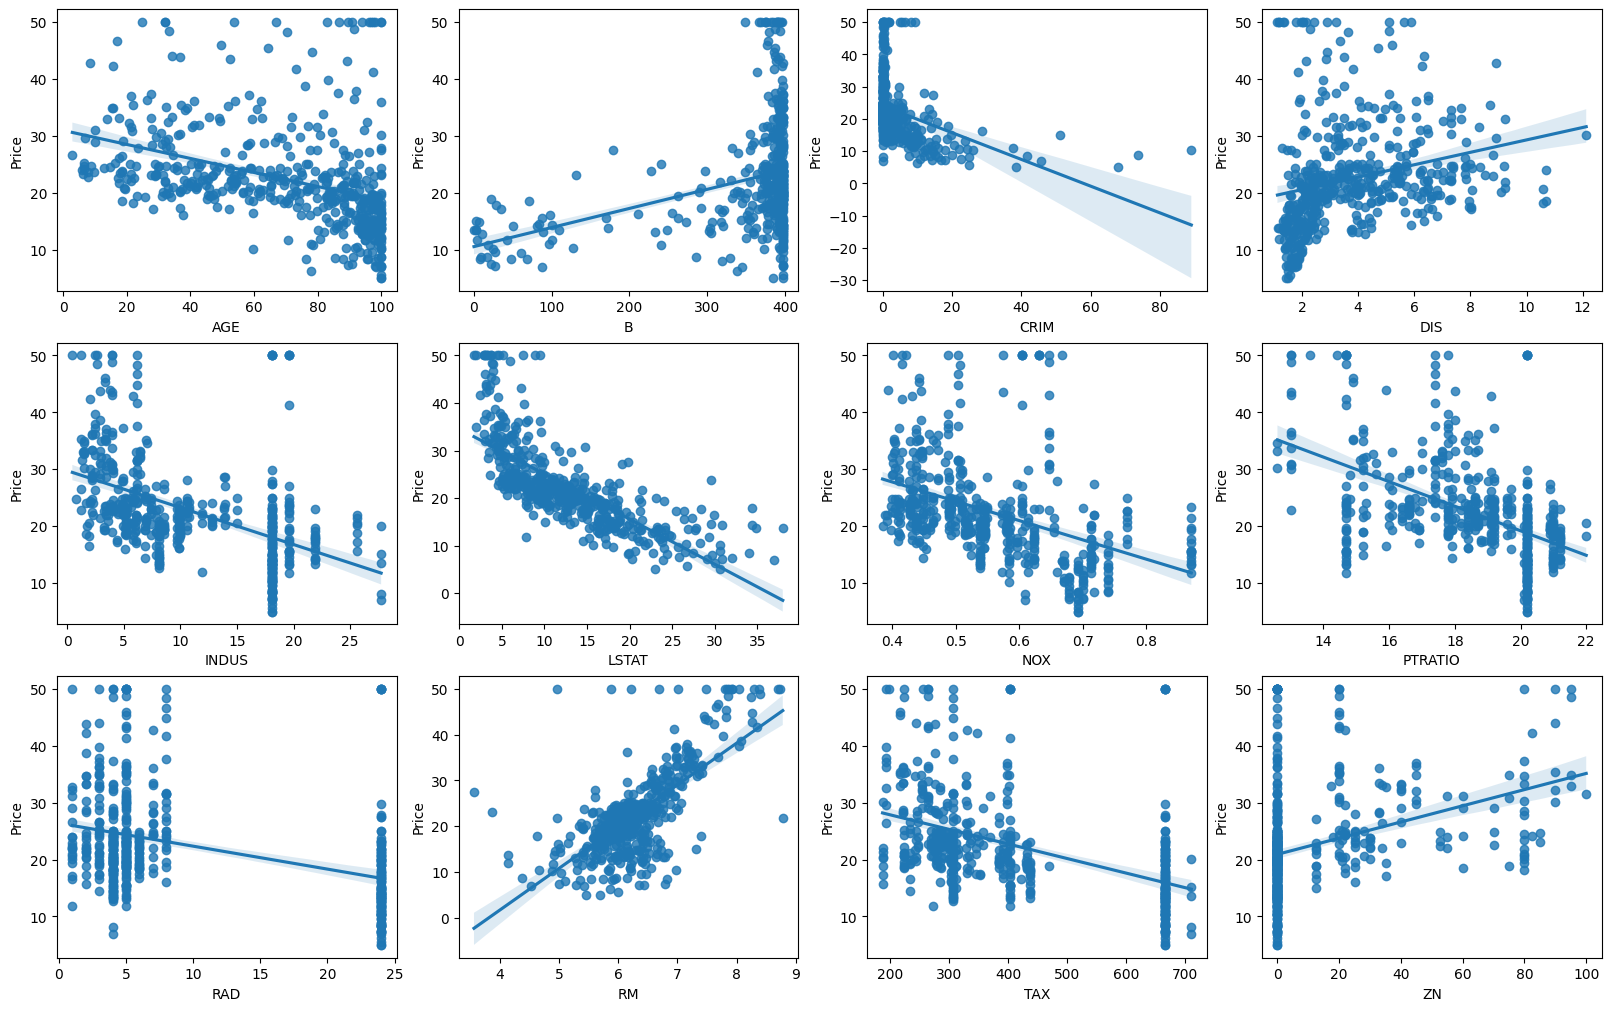

In [9]:
# 산점도와 선열회귀분석 직선 시각화

import matplotlib.pyplot as plt
import seaborn as sns

fig, axs = plt.subplots(figsize=(16, 10), ncols = 4, nrows = 3, constrained_layout = True)
features = boston.columns.difference(['Price', 'CHAS'])

for i, feature in zip(range(12), features):
    row  = int(i/4)
    col = i%4
    sns.regplot(x = feature, y = boston['Price'], data=boston, ax=axs[row][col])


In [13]:
## 데이터 분할

from sklearn.model_selection import train_test_split

feature = boston[['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']].values
label = boston['Price'].values

x_train, x_test, y_train, y_test = train_test_split(feature, label, test_size=0.2,random_state=42)

print("학습데이터의 price의 평균값 : ", y_train.mean())
print("평가데이터의 price의 평균값 : ", y_test.mean())

학습데이터의 price의 평균값 :  22.796534653465343
평가데이터의 price의 평균값 :  21.488235294117644


In [26]:
## 데이터의 전처리 
## 비율 농도 개수 등 서로 다른 단위를 가진 연속형 자료 >> minmax

from sklearn.preprocessing import MinMaxScaler

mn_scaler = MinMaxScaler()

x_train_mn_scale = mn_scaler.fit_transform(x_train)


In [27]:
# 모델 학습 
# ## 모델 학습
## linearRegression(선형 회귀) 알고리즘
from sklearn.linear_model import LinearRegression
li_rgr = LinearRegression()
li_rgr.fit(x_train,y_train)
li_rgr_pred = li_rgr.predict(x_test)

In [28]:
li_rgr_pred = li_rgr.predict(x_test)


In [29]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

mse = mean_squared_error(y_test,li_rgr_pred)
mae = mean_absolute_error(y_test,li_rgr_pred)
rmse = np.sqrt(mse)

# 결졍계수 출력

r2 = r2_score(y_test,li_rgr_pred)

In [30]:
print(mae,mse,rmse,r2)

## 모델의 설명력은 66.4%이다
## MAE를 통하여 pred_train, y_test은 평균 3.23 정도 차이를 보인

3.2372423618144834 24.63539415637433 4.9634054998936294 0.6640648675861136


In [32]:
## 성능평가 및 예측값 저장
## x_test를 scaler.transform()에 입력하여 x_train과 같은 방식으로 Min-Max 정규화를 수행
## x_test_sc를 훈련된 모델에 입력해 예측값을 pred에 저장

x_test_mn_scale = mn_scaler.fit_transform(x_test)
li_rgr_pred_x_test = li_rgr.predict(x_test_mn_scale) 

In [33]:
mse2 = mean_squared_error(y_test,li_rgr_pred_x_test)
mae2 = mean_absolute_error(y_test,li_rgr_pred_x_test)
rmse = np.sqrt(mse2)
r22 = r2_score(y_test, li_rgr_pred_x_test)
print(mae2, mse2, rmse, r22)

7.444150376348889 72.65668184091241 8.523888891868102 0.009233143174003033


In [34]:
pred_df = pd.DataFrame(li_rgr_pred, columns=["pred_price"])
actual = pd.DataFrame(y_test,columns=["actual_price"])


In [39]:
rgr_result=pd.concat([actual,pred_df], axis=1)
rgr_result.to_csv("rgr_result.csv",index=False, encoding="utf-8")
rgr_result.head(3)

,actual_price,pred_price
0,23.6,29.218660
1,32.4,33.551467
2,13.6,14.810658
